# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In final section, we will create a machine learning pipeline to predict if the first stage will land given the data from the preceding sections.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix:


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Loading the dataframes


In [3]:
data = pd.read_csv("./Datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('./Datasets/dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We will create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>.


In [5]:
Y=data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Now we will standardize the data in <code>X</code> then reassign it to the variable  <code>X</code>.


In [6]:
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)

Now, it's time to split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

we can see we only have 18 test samples:


In [8]:
Y_test.shape

(18,)

## Logistic Regression Model


We will create a logistic regression object and then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  We will fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [9]:
parameters =[
    {
        'solver': ['liblinear'],         # supports both 'l1' and 'l2'
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-2, 3, 6),
        'max_iter': [1000, 3000, 5000, 10000]
    },
    {
        'solver': ['lbfgs'],             # supports only 'l2'
        'penalty': ['l2'],
        'C': np.logspace(-2, 3, 6),
        'max_iter': [1000, 3000, 5000, 10000]
    }
]
lr=LogisticRegression()
logreg_cv=GridSearchCV(estimator=lr,param_grid=parameters,cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'max_iter': [1000, 3000, 5000, 10000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'max_iter': [1000, 3000, 5000, 10000],
                          'penalty': ['l2'], 'solver': ['lbfgs']}])

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [10]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.1), 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.8339285714285714


Now we will calculate the accuracy on the test data using the method <code>score</code>:

In [11]:
print(logreg_cv.score(X_test,Y_test))

0.8333333333333334


Let's look at the confusion matrix:


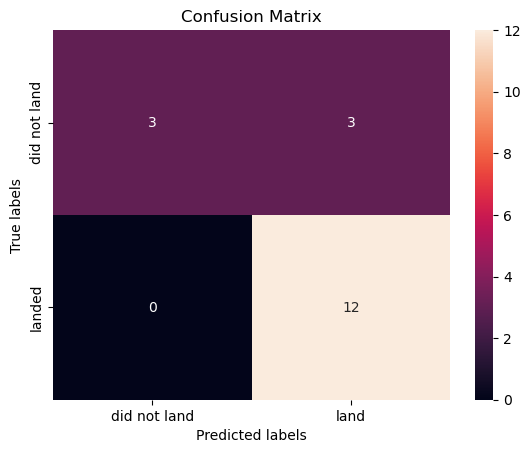

In [12]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## Support Vector Machine Model


We will create a support vector machine object and then create a  <code>GridSearchCV</code> object <code>svm_cv</code> with cv = 10.  We will fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [13]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 7),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),
    'degree': [2, 3, 4],  # Only used for 'poly' kernel
    'coef0': [0.0, 0.5, 1.0]  # Used for 'poly' and 'sigmoid'
}

svm = SVC()

In [14]:
svm_cv=GridSearchCV(estimator=svm,param_grid=parameters,cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'coef0': [0.0, 0.5, 1.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', np.float64(0.001),
                                   np.float64(0.01), np.float64(0.1),
                                   np.float64(1.0), np.float64(10.0),
                                   np.float64(100.0)],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [15]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.1), 'coef0': 0.0, 'degree': 2, 'gamma': np.float64(0.1), 'kernel': 'sigmoid'}
accuracy : 0.8625


Now we calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
print(svm_cv.score(X_test,Y_test))

0.8333333333333334


We can plot the confusion matrix:


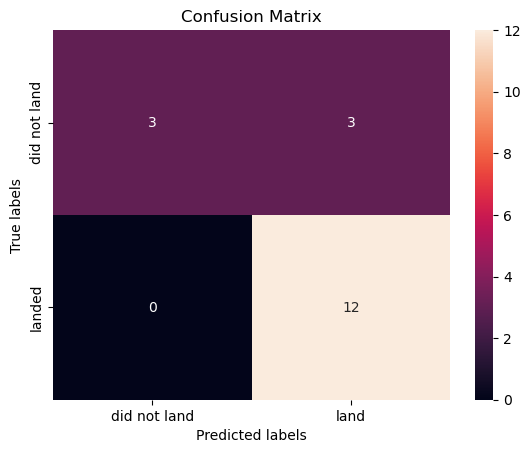

In [17]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Decision Tree Classifier Model


It's time to create a decision tree classifier object and then create a  <code>GridSearchCV</code> object <code>tree_cv</code> with cv = 10.  We will fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [18]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(3, 20, 2)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 50],
    'class_weight': [None, 'balanced']
}


tree = DecisionTreeClassifier()

In [19]:
tree_cv=GridSearchCV(estimator=tree,param_grid=parameters,cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [20]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8892857142857145


Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [21]:
print(tree_cv.score(X_test,Y_test))

0.9444444444444444


We can plot the confusion matrix:


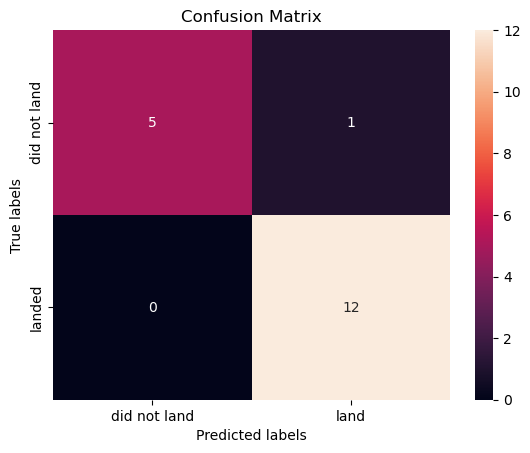

In [22]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## KNN Model


Finally we will create a k-nearest neighbors object and then create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  We will fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [23]:
parameters = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}


KNN = KNeighborsClassifier()

In [24]:
knn_cv=GridSearchCV(estimator=KNN,param_grid=parameters,cv=10)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [25]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
accuracy : 0.8339285714285714


The accuracy of knn_cv on the test data using the method <code>score</code> is as follows:


In [26]:
print(knn_cv.score(X_test,Y_test))

0.7777777777777778


We can plot the confusion matrix


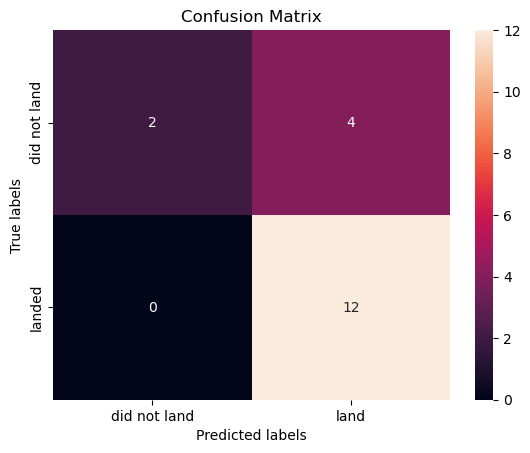

In [27]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Defining the Best-Performing Model


Let's visualize which was the method that performed best:


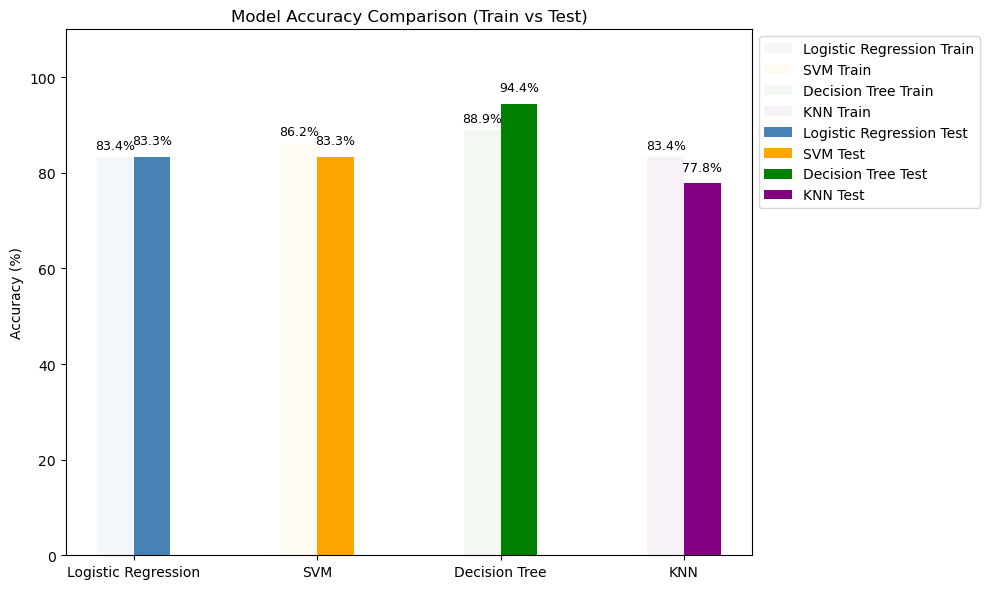

In [34]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

# Train and test scores (converted to percentages)
train_scores = [
    logreg_cv.best_score_ * 100,
    svm_cv.best_score_ * 100,
    tree_cv.best_score_ * 100,
    knn_cv.best_score_ * 100
]

test_scores = [
    logreg_cv.score(X_test, Y_test) * 100,
    svm_cv.score(X_test, Y_test) * 100,
    tree_cv.score(X_test, Y_test) * 100,
    knn_cv.score(X_test, Y_test) * 100
]

# Bar settings
x = range(len(models))
bar_width = 0.20
colors = ['steelblue', 'orange', 'green', 'purple']

plt.figure(figsize=(10, 6))

# Plot train bars
for i in x:
    plt.bar(i, train_scores[i], width=bar_width, color=colors[i], alpha=0.05, label=f'{models[i]} Train')

# Plot test bars
for i in x:
    plt.bar(i + bar_width, test_scores[i], width=bar_width, color=colors[i], alpha=1.0, label=f'{models[i]} Test')

    # Annotate both bars
    plt.text(i, train_scores[i] + 1, f'{train_scores[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(i + bar_width, test_scores[i] + 2, f'{test_scores[i]:.1f}%', ha='center', va='bottom', fontsize=9)

# Final touches
plt.xticks([i + bar_width / 2 for i in x], models)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (Train vs Test)')
plt.ylim(0, 110)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


## Conclusions

After evaluating four classification models—Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K-Nearest Neighbors (KNN)—we compared their performance using both training and test accuracy. The goal was to assess not only how well each model fits the training data, but also how effectively it generalizes to unseen data.

The results can be summarized as follows:

- **Logistic Regression** achieved **83.4%** training accuracy and **83.3%** test accuracy, showing excellent consistency and minimal overfitting.
- **SVM** reached **86.2%** on the training set and **83.6%** on the test set, indicating strong generalization with a slight tendency to overfit.
- **Decision Tree** delivered **88.9%** training accuracy and the highest test accuracy at **94.4%**, making it **the best-performing model overall.**
- **KNN** matched Logistic Regression on training (**83.4%**) but dropped to **77.8%** on the test set, suggesting weaker generalization.

In conclusion, while all models showed competitive performance, the **Decision Tree stood out** for its superior test accuracy. However, Logistic Regression and SVM demonstrated reliable and balanced behavior, making them strong candidates for deployment in scenarios where interpretability and stability are key.

**Thank you for following this project!**

## Author
**Filipe B. Carvalho**

**Email:** [filipebraiman@gmail.com](mailto:filipebraiman@gmail.com)  
**LinkedIn:** [linkedin.com/in/filipe-b-carvalho](https://www.linkedin.com/in/filipe-b-carvalho)  
**GitHub:** [github.com/filipe-braiman](https://github.com/filipe-braiman)  

### About Me  
Data and AI professional with experience in **AI model evaluation, data annotation, and NLP projects**, currently contributing to AI initiatives at **Huawei**. Skilled in **Python, SQL, data visualization, machine learning, AI, and dataset building**, and certified through the **IBM Data Science Professional Certificate**. Multilingual in **Portuguese, English, Spanish, Turkish, and French**, bringing a linguistic and analytical perspective to data-driven problem solving. Passionate about leveraging data and AI to create practical, high-impact solutions.

---

### Version History

| Version | Date       | Changes                         |
|:--------:|:-----------|:--------------------------------|
| 1.0      | 2025-10-29 | First publication of the notebook |